<a href="https://colab.research.google.com/github/Sanaz-salari/Multi-Layer-Perceptron-MLP/blob/main/Pattern_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scipy

In [ ]:
! pip install scikit-optimize

     |████████████████████████████████| 100 kB 5.2 MB/s 


In [ ]:
import sklearn
import skopt
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import RepeatedKFold

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

## Importing required libraries
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.preprocessing import LabelBinarizer
# fix random seed for reproducibility
np.random.seed(5)

In [ ]:
#Load data from local drive 
from google.colab import files
uploaded = files.upload()

Saving Pattern_test.csv to Pattern_test.csv
Saving Pattern_train.csv to Pattern_train.csv


In [ ]:
import pandas as pd
import io
train0 = pd.read_csv(io.BytesIO(uploaded['Pattern_train.csv']))
test0 = pd.read_csv(io.BytesIO(uploaded['Pattern_test.csv']))
train0.head()
train0.shape
test0.shape

,input1,input2,input3,input4,input5,input6,input7,input8,input9,input10,in_control,fault1,fault2,fault3,fault4,fault5,fault6
0,-1.691,-2.426,1.440,-2.688,2.240,-2.577,1.541,-0.045,-1.093,-0.498,1,0,0,0,0,0,0
1,1.337,-0.014,-1.134,1.714,1.821,-1.989,-1.056,-1.823,2.408,0.906,1,0,0,0,0,0,0
2,-0.278,0.169,-2.756,-0.819,2.074,2.179,-0.616,1.405,-2.847,0.325,1,0,0,0,0,0,0
3,1.156,1.827,1.084,-0.675,-2.409,2.970,1.037,-1.972,-0.191,1.514,1,0,0,0,0,0,0
4,-2.849,-2.715,0.909,-0.211,2.050,-2.632,1.746,-0.534,1.426,-1.512,1,0,0,0,0,0,0


In [ ]:
#Clean the data
train0.isna().sum()
test0.isna().sum()

input1        0
input2        0
input3        0
input4        0
input5        0
input6        0
input7        0
input8        0
input9        0
input10       0
in_control    0
fault1        0
fault2        0
fault3        0
fault4        0
fault5        0
fault6        0
dtype: int64

In [ ]:
#To see what data types we have(if we have categorical datatypes, encode them)
train0.dtypes
test0.dtypes

input1        float64
input2        float64
input3        float64
input4        float64
input5        float64
input6        float64
input7        float64
input8        float64
input9        float64
input10       float64
in_control      int64
fault1          int64
fault2          int64
fault3          int64
fault4          int64
fault5          int64
fault6          int64
dtype: object

In [ ]:
#Find Duplicated Data in training
train0[train0.duplicated(['input1','input2','input3','input4','input5','input6','input7','input8','input9','input10'])]
print(train0.duplicated().sum())

0


In [ ]:
#Find Duplicated Data in test dataset
test0[test0.duplicated(['input1','input2','input3','input4','input5','input6','input7','input8','input9','input10'])]
print(test0.duplicated().sum())

0


In [ ]:
#Inspect the data to see whether it needs to do normalization or not
train1_stats = train0.describe()
train1_stats = train1_stats.transpose()
train1_stats

,count,mean,std,min,25%,50%,75%,max
input1,2500.0,-0.005568,1.658949,-2.997,-1.35325,-0.0185,1.39200,2.998
input2,2500.0,0.034232,1.661364,-2.995,-1.32050,0.0655,1.38675,3.000
input3,2500.0,-0.019945,1.616737,-2.997,-1.30225,0.0225,1.27000,2.995
input4,2500.0,0.008083,1.673683,-2.996,-1.38725,0.0540,1.34925,2.997
input5,2500.0,-0.021666,1.585194,-2.996,-1.44275,0.0215,1.35950,2.999
input6,2500.0,-0.022674,1.534029,-2.994,-1.22925,-0.0535,1.19150,2.994
input7,2500.0,0.023896,1.483411,-2.999,-1.00325,0.0350,1.07425,2.997
input8,2500.0,-0.001836,1.501475,-2.991,-1.06725,-0.0110,1.04250,3.000
input9,2500.0,-0.010894,1.536349,-3.000,-1.14200,0.0435,1.10625,2.996
input10,2500.0,-0.027626,1.998715,-4.476,-1.58650,-0.0085,1.49325,4.491


In [ ]:
#Normalization
train2=(train0 - train0.min())/(train0.max() - train0.min())
train2.head()

,input1,input2,input3,input4,input5,input6,input7,input8,input9,input10,in_control,fault1,fault2,fault3,fault4,fault5,fault6
0,0.217848,0.094912,0.740487,0.051393,0.873394,0.069639,0.757171,0.491738,0.318045,0.443627,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.722936,0.497248,0.310915,0.785917,0.803503,0.167836,0.324049,0.194959,0.901935,0.600201,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.453545,0.527773,0.040220,0.363257,0.845705,0.863894,0.397432,0.733767,0.025517,0.535408,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.692744,0.804337,0.681075,0.387285,0.097915,0.995992,0.673115,0.170088,0.468479,0.668005,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.024687,0.046706,0.651869,0.464709,0.841701,0.060454,0.791361,0.410115,0.738159,0.330545,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#Normalization
test2=(test0 - train0.min())/(train0.max() - train0.min())
test2.head()

,input1,input2,input3,input4,input5,input6,input7,input8,input9,input10,in_control,fault1,fault2,fault3,fault4,fault5,fault6
0,0.217848,0.094912,0.740487,0.051393,0.873394,0.069639,0.757171,0.491738,0.318045,0.443627,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.722936,0.497248,0.310915,0.785917,0.803503,0.167836,0.324049,0.194959,0.901935,0.600201,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.453545,0.527773,0.040220,0.363257,0.845705,0.863894,0.397432,0.733767,0.025517,0.535408,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.692744,0.804337,0.681075,0.387285,0.097915,0.995992,0.673115,0.170088,0.468479,0.668005,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.024687,0.046706,0.651869,0.464709,0.841701,0.060454,0.791361,0.410115,0.738159,0.330545,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#Normalization
#train2=(train1 - train1.min())/(train1.max() - train1.min())
#train2.head()

In [ ]:
#Normalization
#test2=(test1 - train1.min())/(train1.max() - train1.min())
#test2.head()

In [ ]:
#Split features from labels
#Separate the target values from the features. This targets are the values that we will train the model to predict.
train2_features = train2.copy()
test2_features = test2.copy()
train2_labels = train2_features.iloc[:, 10:17]

train2_features.drop(['in_control','fault1','fault2','fault3','fault4','fault5','fault6',], axis = 1, inplace = True)
print(train2_features.shape)
print(train2_labels.shape)

(2500, 10)
(2500, 7)


In [ ]:
#Split features from labels
#Separate the target values from the features. This targets are the values that we will train the model to predict.
test2_features = test2.copy()
test2_labels = test2_features.iloc[:, 10:17]

test2_features.drop(['in_control','fault1','fault2','fault3','fault4','fault5','fault6',], axis = 1, inplace = True)
print(test2_features.shape)
print(test2_labels.shape)

(250, 10)
(250, 7)


In [ ]:
# Normalized:
###df_x_n=(df_x - df_x.min())/(df_x.max()-df_x.min())
###df_y_n=(df_y - df_y.min())/(df_y.max()-df_y.min())

# Standardization with mean= 0 and variance and std=1
df_x_n=(df_x - df_x.mean())/(df_x.std()) #standardized whole dataframe of features, not train or test
df_y_n=(df_y - df_y.mean())/(df_y.std())

X = df_x_n.to_numpy()
y = df_y_n.to_numpy()
Y = df_y.to_numpy()# output w/o standardization

In [ ]:
# Change train and test datasets from matrix to array:
X_train = train2_features.to_numpy()
y_train = train2_labels.to_numpy()
X_test = test2_features.to_numpy()
y_test = test2_labels.to_numpy()
X_train = X_train.reshape([X_train.shape[0], -1])
X_test = X_test.reshape([X_test.shape[0], -1])

y_train= train2_labels
y_test= test2_labels
# Printing dimensions
print(X_train.shape, y_train.shape)

(2500, 10) (2500, 7)


In [ ]:
X_train[0].shape

(10,)

In [ ]:
model = keras.Sequential([
                  keras.layers.Dense(7, input_shape=(10,), activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train, y_train, epochs=5)

Epoch 1/5
79/79 [==============================] - 1s 2ms/step - loss: 1.8398 - accuracy: 0.3568
Epoch 2/5
79/79 [==============================] - 0s 4ms/step - loss: 1.7869 - accuracy: 0.3964
Epoch 3/5
79/79 [==============================] - 0s 3ms/step - loss: 1.7752 - accuracy: 0.3996
Epoch 4/5
79/79 [==============================] - 0s 2ms/step - loss: 1.7725 - accuracy: 0.4000
Epoch 5/5
79/79 [==============================] - 0s 3ms/step - loss: 1.7710 - accuracy: 0.4000


In [ ]:
#Evaluate model on the test dataset
model.evaluate(X_test, y_test)

8/8 [==============================] - 0s 2ms/step - loss: 1.7662 - accuracy: 0.4000


[1.7662326097488403, 0.4000000059604645]

In [ ]:
#sample prediction
y_predicted = model.predict(X_test)
y_predicted[2]

array([0.749457  , 0.3646825 , 0.40812185, 0.40990818, 0.39175245,
       0.46627772, 0.4184214 ], dtype=float32)

In [ ]:
np.argmax(y_predicted[2])

0

In [ ]:
#To change y_predicted to concrete class labels
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[6, 3, 4, 3, 6]

In [ ]:
#To improve model, we will add hidden layers
from tensorflow.keras import regularizers
from tensorflow.keras import layers
from tensorflow.keras import initializers
model = keras.Sequential([
                  keras.layers.Dense(30, input_shape=(10,), activation='relu',
                  kernel_regularizer=regularizers.l1_l2(l1=1e-4, l2=1e-4),
                  bias_regularizer=regularizers.l2(1e-4),
                  activity_regularizer=regularizers.l2(1e-4),
                  kernel_initializer = tf.keras.initializers.HeUniform(),
                  name="dense_1"),
                  keras.layers.Dense(12, input_shape=(10,), activation='relu',
                  kernel_regularizer=regularizers.l1_l2(l1=1e-4, l2=1e-4),
                  bias_regularizer=regularizers.l2(1e-4),
                  activity_regularizer=regularizers.l2(1e-4),
                  kernel_initializer = tf.keras.initializers.HeUniform(),
                  name="dense_2"),
                  keras.layers.Dense(7, activation='sigmoid',kernel_initializer = tf.keras.initializers.GlorotUniform())
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
79/79 [==============================] - 2s 3ms/step - loss: 1.8929 - accuracy: 0.3052
Epoch 2/100
79/79 [==============================] - 0s 4ms/step - loss: 1.7734 - accuracy: 0.4000
Epoch 3/100
79/79 [==============================] - 0s 2ms/step - loss: 1.7400 - accuracy: 0.4000
Epoch 4/100
79/79 [==============================] - 0s 3ms/step - loss: 1.7197 - accuracy: 0.4000
Epoch 5/100
79/79 [==============================] - 0s 3ms/step - loss: 1.7002 - accuracy: 0.4000
Epoch 6/100
79/79 [==============================] - 0s 2ms/step - loss: 1.6751 - accuracy: 0.4004
Epoch 7/100
79/79 [==============================] - 0s 2ms/step - loss: 1.6500 - accuracy: 0.4008
Epoch 8/100
79/79 [==============================] - 0s 2ms/step - loss: 1.6186 - accuracy: 0.4028
Epoch 9/100
79/79 [==============================] - 0s 2ms/step - loss: 1.5858 - accuracy: 0.4040
Epoch 10/100
79/79 [==============================] - 0s 2ms/step - loss: 1.5486 - accuracy: 0.4112
Epoch 11/

In [ ]:
#Evaluate model on the test dataset
model.evaluate(X_test, y_test)

8/8 [==============================] - 0s 2ms/step - loss: 0.3560 - accuracy: 0.9080


[0.35598263144493103, 0.9079999923706055]

In [ ]:
#sample prediction
y_predicted = model.predict(X_test)
y_predicted[1]

array([9.9958718e-01, 1.4425588e-01, 3.8482538e-01, 8.0323219e-04,
       3.9243698e-04, 8.8894421e-07, 7.0255703e-01], dtype=float32)

In [ ]:
X = train2_features.to_numpy()
y = train2_labels.to_numpy()

In [ ]:
#Check Training History
# Define function for plotting history
import matplotlib.pyplot as plt
def plot_metrics(history):
  metrics =  ['loss', 'accuracy']
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(1,2,n+1)
    plt.tight_layout()
    plt.plot(history.epoch,  history.history[metric], color=colors[0], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
             color=colors[0], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    plt.legend()

In [ ]:
# Plot the training/validation history of our Keras model
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
plot_metrics(history)

In [ ]:
#Run Scikit-Optimizer
import warnings
warnings.filterwarnings('ignore')

results_gp = skopt.gp_minimize(objective,     # the function to minimize
                          SPACE,              # the bounds on each dimension of x
                          n_initial_points=10,      # the starting point        ###acq_func="LCB",     # the acquisition function (optional)                          
                          n_calls=10,         # the number of evaluations of f including at x0                          
                          random_state=0)

# summarize performance
###print('MSE mean and std: %.3f (%.3f)' % (np.mean(results), np.std(results)))

Test loss: -0.4154386520385742    Test accuracy: 0.0


KeyboardInterrupt: ignored

In [ ]:
results_gp

          fun: -16.18962852160136
    func_vals: array([-15.40254768, -14.40351731, -13.41413085, -16.18962852,
       -14.2598985 , -14.14933236, -13.39249825, -14.31138388,
       -15.38003262, -13.49453115])
       models: [GaussianProcessRegressor(kernel=1**2 * Matern(length_scale=[1, 1, 1], nu=2.5) + WhiteKernel(noise_level=1),
                         n_restarts_optimizer=2, noise='gaussian',
                         normalize_y=True, random_state=209652396)]
 random_state: RandomState(MT19937) at 0x7F3E126B08D0
        space: Space([Integer(low=20, high=24, prior='uniform', transform='normalize'),
       Integer(low=20, high=24, prior='uniform', transform='normalize'),
       Real(low=0.0, high=0.5, prior='uniform', transform='normalize')])
        specs: {'args': {'func': <function objective at 0x7f3e130cee60>, 'dimensions': Space([Integer(low=20, high=24, prior='uniform', transform='normalize'),
       Integer(low=20, high=24, prior='uniform', transform='normalize'),
       Re

In [ ]:
#Get Best Parameter Set
"Best score=%.4f" % results_gp.fun

print("""Best parameters:
- dense_0_neurons=%d
- dense_1_neurons=%d
- dropout_rate=%.6f""" % 
      (results_gp.x[0], results_gp.x[1],
                            results_gp.x[2]))

Best parameters:
- dense_0_neurons=22
- dense_1_neurons=23
- dropout_rate=0.239989


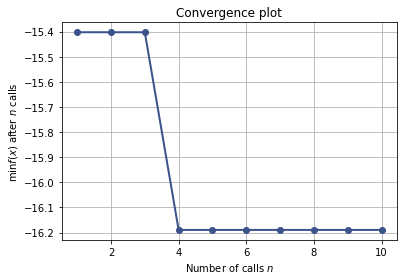

In [ ]:
#Convergence Plot
from skopt.plots import plot_convergence
plot_convergence(results_gp)